In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms 
import sklearn
import sklearn.metrics as metrics
import numpy as np

import pandas as pd
from torch.utils.data import Dataset
import os 
from PIL import Image

In [2]:
class CUB (Dataset):
    '''
    parts 
        part_locs 
        parts 
    images 
        200 classes
    classes.txt
    train_test_split.txt
    image_class_labels.txt
    
    '''
    def __init__(self, root_dir, transform = None):
        self.root_dir = root_dir # D:\TorchProject\dataset\cub\CUB_200_2011
        self.transform = transform
        self.image_dir = os.path.join(root_dir,'images')
        self.image_mapping = self._load_image_mapping()
        self.label_mapping = self._load_label_mapping()
#        self.bbox_mapping = self._load_bbox_mapping ()
#        self.attribute_mapping = self._load_attribute_mapping()
#        self.part_bbox_mapping = self._load_part_bbox_mapping()
        self.part_locs_mapping = self._load_part_locs_mapping()

    def _load_part_locs_mapping (self):
        part_locs_mapping = {}
        part_locs = os.path.join(self.root_dir, 'parts', 'part_locs.txt')
        with open(part_locs, 'r') as file:
            for line in file:
                image_id, part_id, x, y, visible = line.strip().split()
                if visible == '1':
                    if image_id not in part_locs_mapping:
                        part_locs_mapping[image_id] = {}
                    part_locs_mapping[image_id][part_id] = [float (x), float (y)]
                    # part_locs_mapping[image_id]['visible'] = float(visible)
        return part_locs_mapping

    def _load_label_mapping (self): # why "_load_..." ? --> chi dung trong class nay, k call dc tu ben ngoai
        label_mapping = {}
        label_file = os.path.join(self.root_dir,'image_class_labels.txt')
        with open(label_file, 'r') as file:
            for line in file:
                image_id, label_id = line.strip().split()
                label_mapping[image_id] = int(label_id)
        return label_mapping

    def _load_image_mapping (self):
        image_mapping = {}
        image_file = os.path.join(self.root_dir,'images.txt')
        with open(image_file, 'r') as file:
            for line in file:
                image_id, image_name = line.strip().split()
                image_mapping[image_id] = image_name
        return image_mapping

    # def _load_bbox_mapping (self):
    #     bbox_mapping = {}
    #     bbox_file = os.path.join(self.root_dir,'bounding_boxes.txt')
    #     with open(bbox_file, 'r') as file:
    #         for line in file:
    #             image_id, x, y, width, height = line.strip().split()

    #             bbox_mapping[image_id] = [float (x), float (y), float (width), float (height)]
    #     return bbox_mapping

    # def _load_attribute_mapping(self):
    #     attribute_mapping = {}
    #     attribute_file = os.path.join(self.root_dir, 'attributes', 'image_attribute_labels.txt')
    #     with open(attribute_file, 'r') as file:
    #         for line in file:
    #             if len((line.strip().split())) != 5:
    #                 image_id, attribute_id, is_present, _, _, _ = line.strip().split()
    #             else:
    #                 image_id, attribute_id, is_present, _, _= line.strip().split()
    #             if image_id not in attribute_mapping:
    #                 attribute_mapping[image_id] = []
    #             attribute_mapping[image_id].append(attribute_id)
    #     return attribute_mapping

    # def _load_part_bbox_mapping(self):
    #     part_bbox_mapping = {}
    #     part_bbox_file = os.path.join(self.root_dir, 'parts', 'part_locs_test.txt')
    #     with open(part_bbox_file, 'r') as file:
    #         for line in file:
    #             image_id, part_id, x, y, visible = line.strip().split()
    #             if visible == '1':
    #                 if image_id not in part_bbox_mapping:
    #                     part_bbox_mapping[image_id] = {}
    #                 part_bbox_mapping[image_id][part_id] = [float(x), float(y)]
    #     return part_bbox_mapping

    def __len__(self):
        return len(self.image_mapping)

    def __getitem__(self, index):
#        label = self.label_mapping[str(index+1)]
#        bbox = self.bbox_mapping[str(index+1)]
#        attribute = self.attribute_mapping.get(str(index), [])
#        part_bbox = self.part_bbox_mapping.get(str(index), {})
#        part_locs = self.part_bbox_mapping.get(str(index), [])
#        image_name = self.image_mapping[str(index)]
        
        label = self.label_mapping[str(index+1)]
        part_locs = self.part_locs_mapping.get(str(index), [])
        image_name = self.image_mapping[str(index)]
        print(image_name)

        image= Image.open(os.path.join(self.image_dir,image_name)).convert('RGB')

        if self.transform:
           image = self.transform(image)
        return (image, label, part_locs)
#        return (image, label, bbox, attribute, part_bbox, part_locs)

11788
001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
1 {'2': [312.0, 182.0], '5': [186.0, 45.0], '6': [247.0, 79.0], '10': [100.0, 221.0], '11': [183.0, 101.0], '15': [215.0, 194.0]}


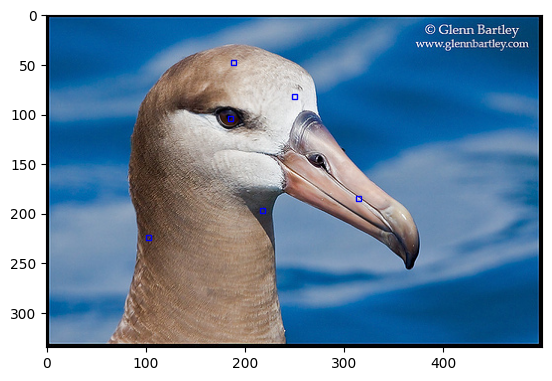

001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg
1 {'1': [228.0, 138.0], '2': [282.0, 154.0], '4': [248.0, 158.0], '5': [266.0, 141.0], '6': [272.0, 144.0], '9': [208.0, 102.0], '10': [256.0, 141.0], '11': [270.0, 146.0], '13': [234.0, 193.0], '14': [163.0, 155.0], '15': [260.0, 155.0]}


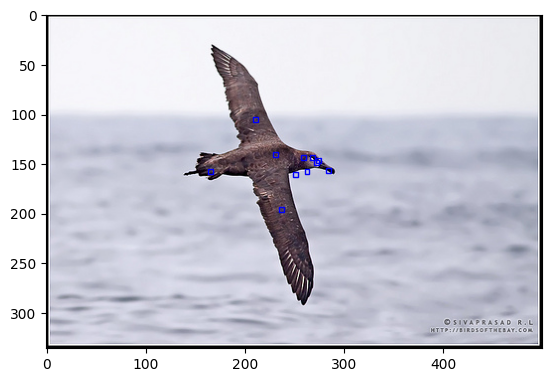

001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
1 {'1': [227.0, 213.0], '2': [376.0, 160.0], '4': [325.0, 243.0], '5': [324.0, 121.0], '6': [349.0, 128.0], '9': [170.0, 198.0], '10': [288.0, 169.0], '11': [336.0, 136.0], '13': [199.0, 237.0], '14': [42.0, 201.0], '15': [327.0, 174.0]}


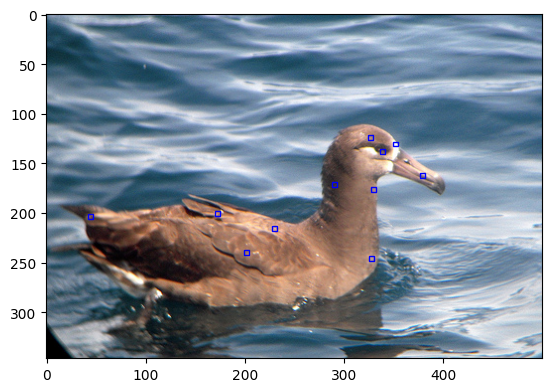

001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg
1 {'1': [221.0, 179.0], '2': [126.0, 203.0], '4': [190.0, 215.0], '5': [157.0, 180.0], '6': [145.0, 187.0], '7': [153.0, 189.0], '9': [238.0, 245.0], '10': [182.0, 183.0], '13': [235.0, 133.0], '14': [337.0, 211.0], '15': [174.0, 207.0]}


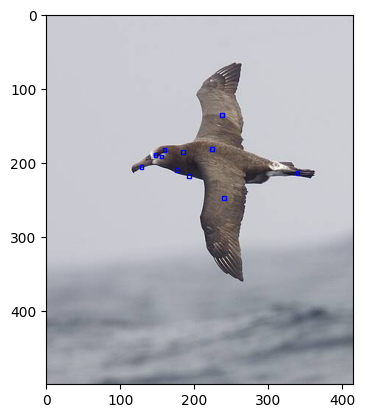

001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg
1 {'2': [194.0, 147.0], '3': [132.0, 159.0], '4': [154.0, 153.0], '5': [177.0, 137.0], '6': [183.0, 139.0], '9': [137.0, 203.0], '10': [166.0, 137.0], '11': [179.0, 141.0], '13': [138.0, 107.0], '14': [76.0, 160.0], '15': [175.0, 150.0]}


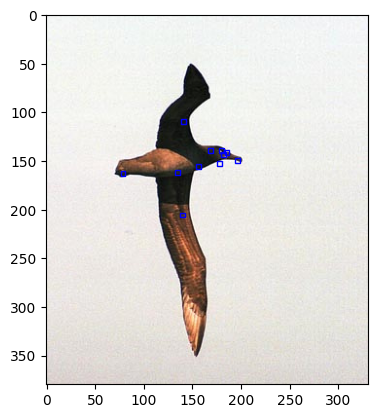

001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg
1 {'1': [163.0, 180.0], '2': [264.0, 202.0], '4': [190.0, 213.0], '5': [240.0, 181.0], '6': [253.0, 187.0], '8': [57.0, 190.0], '9': [193.0, 108.0], '10': [221.0, 181.0], '11': [244.0, 189.0], '12': [78.0, 226.0], '13': [126.0, 267.0], '14': [82.0, 199.0], '15': [228.0, 204.0]}


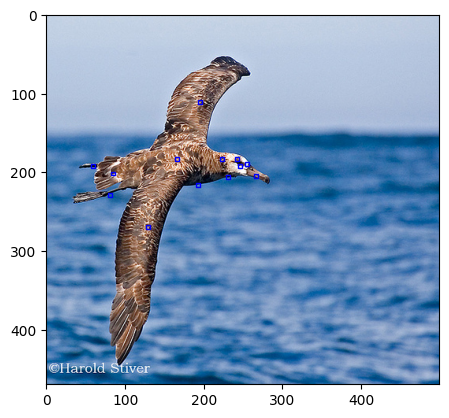

001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg
1 {'2': [362.0, 243.0], '5': [212.0, 94.0], '6': [290.0, 133.0], '10': [116.0, 229.0], '11': [240.0, 152.0], '15': [251.0, 234.0]}


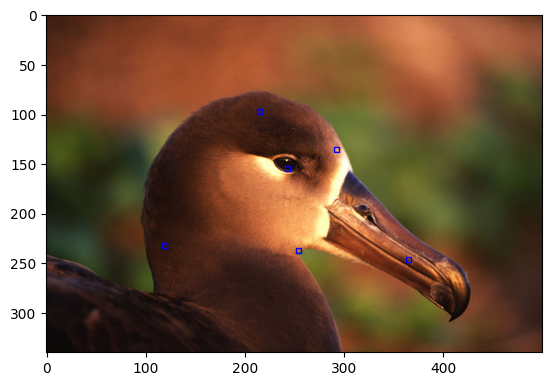

001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg
1 {'1': [225.0, 162.0], '2': [107.0, 132.0], '4': [151.0, 194.0], '5': [142.0, 96.0], '6': [120.0, 108.0], '7': [136.0, 111.0], '9': [246.0, 186.0], '10': [175.0, 135.0], '14': [388.0, 151.0], '15': [145.0, 139.0]}


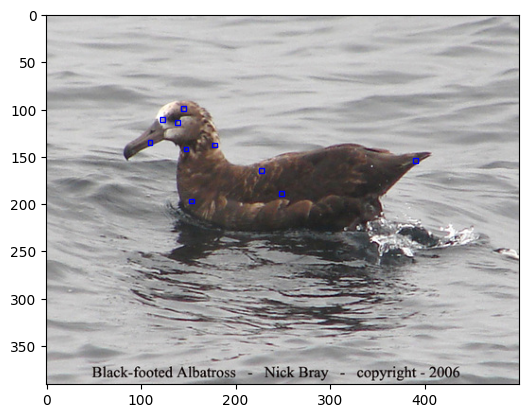

001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
1 {'1': [197.0, 136.0], '2': [129.0, 154.0], '4': [182.0, 164.0], '5': [150.0, 137.0], '6': [140.0, 143.0], '7': [146.0, 145.0], '9': [215.0, 189.0], '10': [169.0, 139.0], '13': [228.0, 112.0], '14': [298.0, 172.0], '15': [153.0, 158.0]}


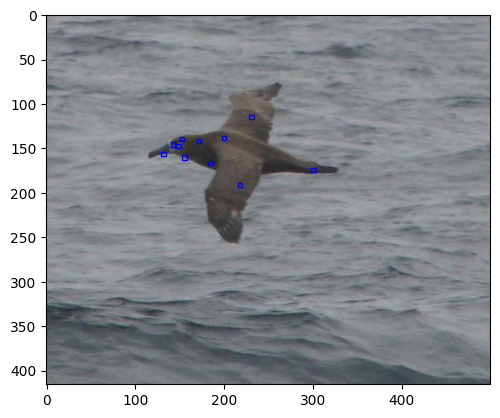

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import DataLoader
import os

def visualize_bounding_box(image, part_locs):
        # Create figure and axes
        fig, ax = plt.subplots(1)

        # Display the image
        ax.imshow(image)

    # Extract bounding box coordinates
        locs  = part_locs

        # Iterate over part bounding boxes and draw rectangles
        for part_id, part_bb in part_locs.items():
            x_pb, y_pb = part_bb
            width_pb, height_pb = 5, 5  # Modify the width and height as per your requirement

            rect_pb = patches.Rectangle((x_pb, y_pb), width_pb, height_pb, linewidth=1, edgecolor='b', facecolor='none')

            ax.add_patch(rect_pb)

            # Show the plot
        plt.show()


# Example usage

root_dir = 'D:\TorchProject\dataset\cub\CUB_200_2011'
# run dataser == __init__
dataset = CUB(root_dir) # --> load sample to check
dataloader = DataLoader(dataset, batch_size=2, shuffle=False) #divide dataset by batch

# call len  == __len__
print (len(dataset))

for i in range (1,10):
    image,label,part_locs = dataset[i]

    print (label,part_locs)

    # Visualize all bounding boxes
    visualize_bounding_box(image, part_locs)